# Feature Scaling

In [1]:
from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [2]:
data = np.loadtxt('./data/houses.txt', delimiter=',', skiprows=1)

In [3]:
X_train = data[:, :4]
y_train = data[:, 4]

X_features = ['size', 'n_bedrooms', 'floors', 'age']

In [4]:
from lab_utils_multi import run_gradient_descent

In [5]:
run_gradient_descent(
    X_train,
    y_train,
    1000,
    alpha=9e-7
);

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
      100 1.58690e+03  2.6e-01 -9.9e-05 -5.0e-04 -5.3e-02  5.7e-04 -1.4e+04 -2.0e+01 -5.5e+00  2.8e+02 -1.4e+01
      200 1.51091e+03  2.6e-01 -6.4e-04 -1.2e-03 -1.1e-01  1.0e-03 -3.9e+02  4.9e+00  7.8e+00  5.6e+02 -5.1e+00
      300 1.48390e+03  2.6e-01 -1.1e-03 -2.0e-03 -1.6e-01  1.4e-03 -2.2e+01  5.2e+00  8.1e+00  5.2e+02 -5.1e+00
      400 1.46102e+03  2.6e-01 -1.6e-03 -2.7e-03 -2.0e-01  1.9e-03 -1.2e+01  4.8e+00  8.0e+00  4.8e+02 -5.3e+00
      500 1.44160e+03  2.6e-01 -2.0e-03 -3.4e-03 -2.4e-01  2.4e-03 -1.1e+01  4.4e+00  8.0e+00  4.5e+02 -5.5e+00
      600 1.42513e+03  2.6e-01 -2.4e-03 -4.1e-03 -2.8e-01  2.9e-03 -9.7e+00  4.1e+00  7.9e+00  4.1e+02 -

**w0 decreases much faster than other w's**

## Z-Score normalization

In [6]:
from mlutils import z_normalize

In [7]:
from sklearn.preprocessing import scale

def check_normalize(x):
    return scale(x, with_mean=True, with_std=True, copy=True)

In [8]:
X_orig = deepcopy(X_train)

X_norm, mu, sigma = z_normalize(X_train)
check = check_normalize(deepcopy(X_orig))

In [9]:
np.equal(X_norm, check).all()  # Do all the values evaluate to true?

np.True_

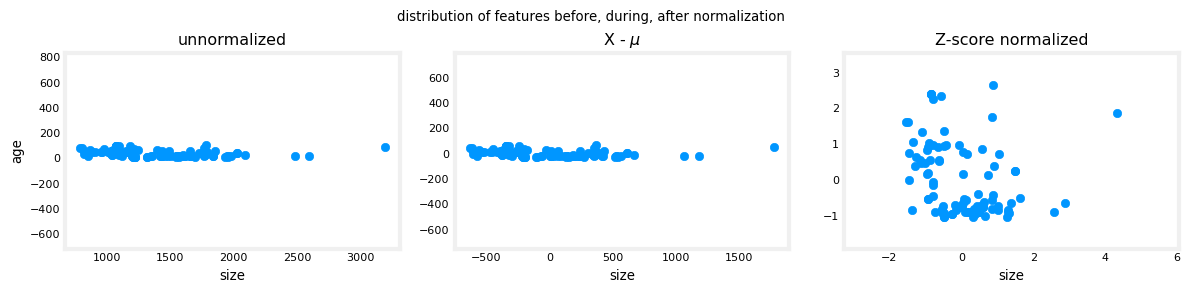

In [10]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [11]:
run_gradient_descent(
    X_norm,
    y_train,
    1000,
    alpha=9e-7
);

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 7.13691e+04  8.0e-05  2.7e-05  3.0e-05 -5.4e-05  3.3e-04 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 7.13560e+04  8.1e-03  2.7e-03  3.0e-03 -5.4e-03  3.3e-02 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      200 7.13429e+04  1.6e-02  5.3e-03  5.9e-03 -1.1e-02  6.6e-02 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      300 7.13299e+04  2.4e-02  8.0e-03  8.9e-03 -1.6e-02  9.8e-02 -8.9e+01 -2.9e+01 -3.3e+01  6.0e+01 -3.6e+02
      400 7.13168e+04  3.2e-02  1.1e-02  1.2e-02 -2.2e-02  1.3e-01 -8.9e+01 -2.9e+01 -3.3e+01  6.0e+01 -3.6e+02
      500 7.13037e+04  4.0e-02  1.3e-02  1.5e-02 -2.7e-02  1.6e-01 -8.9e+01 -2.9e+01 -3.3e+01  6.0e+01 -3.6e+02
      600 7.12907e+04  4.8e-02  1.6e-02  1.8e-02 -3.2e-02  2.0e-01 -8.9e+01 -2.9e+01 -3.3e+01  6.0e+01 -

**The algorithm now converges faster**

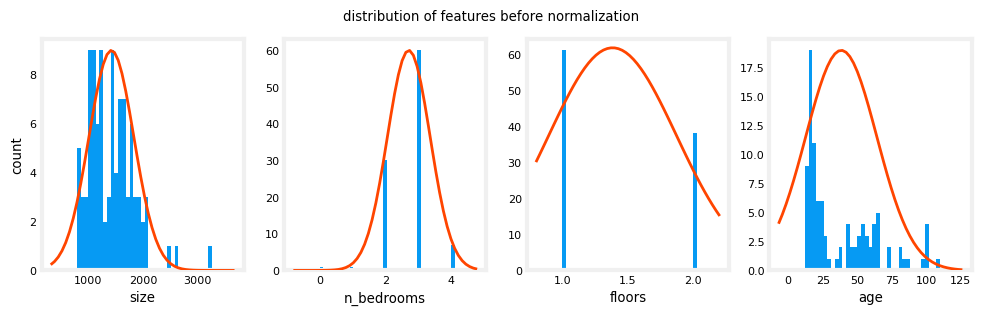

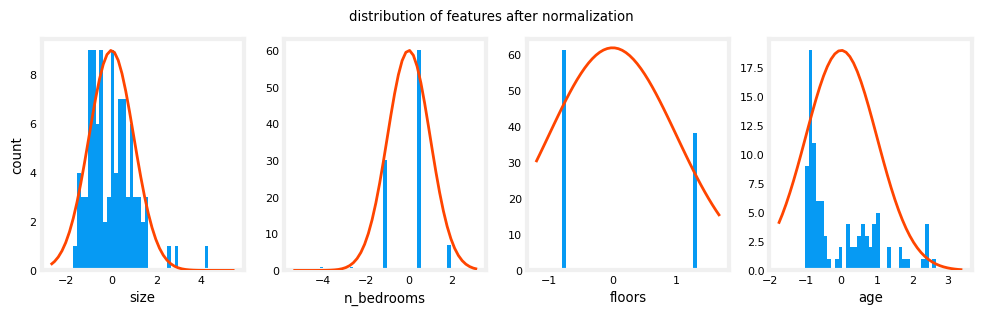

In [13]:
from lab_utils_multi import norm_plot

fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_orig[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()

fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()